In [8]:
import sys, os
import pandas as pd
sys.path.append(os.path.realpath('..'))
from MiningBot.AuditHistory.History import History
import json
import socket
from datetime import datetime, timedelta

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import matplotlib.colors as mc
import mplcyberpunk
plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [10]:
config_dir = r'../MiningBot/Configs/configs.json'
config = json.load(open(config_dir))[socket.gethostname()]

In [11]:
log = History(config_dir=config_dir)

In [12]:
records = log.get_all()

In [13]:
df = pd.DataFrame(records)
df = df.sort_values(by='datetime', ascending=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['timedelta'] = df['datetime'].diff().dt.seconds.div(60, fill_value=0)
df

,_id,datetime,action,context,timedelta
2316,63fbf54550fce419f8da4011,2023-02-27 00:11:49.774,Main_Loop_Startup,Login Sequence Starting,0.000000
2315,63fbf29873d6c1c1d16530fb,2023-02-27 00:00:24.555,Extraction,,1428.566667
2314,63fbf0a173d6c1c1d16530fa,2023-02-26 23:52:01.455,Extraction,,1431.600000
2313,63fbef4873d6c1c1d16530f9,2023-02-26 23:46:16.241,Extraction,,1434.233333
2312,63fbef3f73d6c1c1d16530f8,2023-02-26 23:46:07.245,Navigating,Site Three Alpha,1439.850000
...,...,...,...,...,...
4,63f42151d2bfb6cfc297a6f4,2023-02-21 01:41:37.885,Extraction,,1431.383333
3,63f41f4dd2bfb6cfc297a6f3,2023-02-21 01:33:01.297,Extraction,,1431.383333
2,63f41dfcd2bfb6cfc297a6f2,2023-02-21 01:27:24.965,Extraction,,1434.383333
1,63f41cacd2bfb6cfc297a6f1,2023-02-21 01:21:48.775,Extraction,,1434.383333


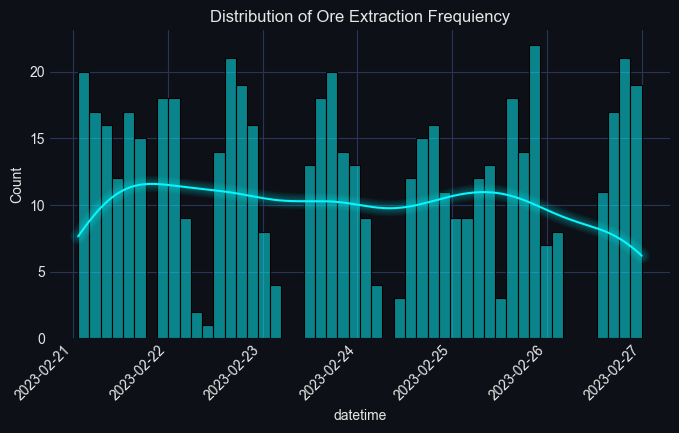

In [7]:
histplot_hyperparams = {
    'kde':True,
    'alpha':0.5,
    #'stat':'percent',
    'bins':50
}


n_cols = 1
n_rows = 1
cell_with_dim = 8
cell_height_dim = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
plt.title('Distribution of Ore Extraction Frequiency')
sns.histplot(df[df['action']=='Extraction']['datetime'], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
plt.xticks(rotation=45, ha='right')
mplcyberpunk.make_lines_glow(ax)